In [1]:
import sys, os, time
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib tk
import numpy as np
import select
import json
import yaml
import matplotlib.pyplot as plt
from collections import namedtuple, OrderedDict
import multiprocessing as mp
import random
from string import Formatter
from scipy.special import softmax
from itertools import chain, product
# import gsm
import gsm
from gsm import tdict, tlist, tset, tstack, tdeque
from gsm import GameObject, GameLogger
from gsm.mixins import Named
from gsm import Array
from gsm import viz
from gsm import util
from examples.tictactoe import TicTacToe
from gsm.common.world import grid
np.set_printoptions(linewidth=120)

/mnt/c/Users/anwan/Nextcloud/Khan/projects/gsm/git/gsm/io/registry.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  info = yaml.load(open(path, 'r'))


In [2]:
seed = 0
# seed = None
I = viz.Ipython_Runner(r'http://localhost:5000/', 'me', full_log=True, god_mode=True, seed=seed)

In [3]:
I.restart(debug=True)
I.select_game('catan')
I.add_client('randy', 'polly', 'pal', interface='agent', agent_type='pass', timeout=None, seed=I.seed, prob=.5)

'Created an interface (agent) for: randy, polly, pal'

In [4]:
I.ping()

{'randy': ['ping reply from pass agent/s: randy, polly, pal',
  1.845855951309204],
 'polly': ['ping reply from pass agent/s: randy, polly, pal', 0.0],
 'pal': ['ping reply from pass agent/s: randy, polly, pal',
  0.0009751319885253906]}

In [5]:
I.add_player('randy', 'Blue')
I.add_player('polly', 'Red')
I.add_player('pal', 'White')
I.add_spectator('me')
# I.add_player('me', 'White')
I.get_roles()

{'pal': 'White', 'polly': 'Red', 'randy': 'Blue'}

In [6]:
I.toggle_pause()

'auto pause is activated'

In [7]:
I.begin()

'Catan has started'

In [8]:
for _ in range(20):
    I.go()
    I.status()
I.view()

Received table: 160 entries
-------------
Log
-------------
PLYR:White builds a OBJ[148]:settlement[148] (gaining 1 victory point)
PLYR:White builds a OBJ[149]:road[149]
PLYR:Red builds a OBJ[150]:settlement[150] (gaining 1 victory point)
PLYR:Red builds a OBJ[151]:road[151]
PLYR:Blue builds a OBJ[152]:settlement[152] (gaining 1 victory point)
PLYR:Blue builds a OBJ[153]:road[153]
PLYR:Blue builds a OBJ[154]:settlement[154] (gaining 1 victory point)
PLYR:Blue gains: sheep, ore, and sheep
PLYR:Blue builds a OBJ[155]:road[155]
PLYR:Red builds a OBJ[156]:settlement[156] (gaining 1 victory point)
PLYR:Red gains: sheep
PLYR:Red builds a OBJ[157]:road[157]
PLYR:White builds a OBJ[158]:settlement[158] (gaining 1 victory point)
PLYR:White gains: sheep, wheat, and sheep
PLYR:White builds a OBJ[159]:road[159]
PLYR:White rolled: 8.
-*- PLYR:Red  gains  1 brick.
(White): -*- You start a trade
(White): -*- -*- You demand a wheat
(White): -*- -*- You demand a brick
(White): -*- -*- You demand a shee

In [9]:
I.save('test_save')

'game test_save.gsm saved'

In [7]:
I.load('test_save', load_interface=False)

'Game test_save.gsm loaded.'

In [8]:
for _ in range(10):
    I.go()
    I.status()
I.view()

Received table: 160 entries
-------------
Log
-------------
PLYR:White builds a OBJ[148]:settlement[148] (gaining 1 victory point)
PLYR:White builds a OBJ[149]:road[149]
PLYR:Red builds a OBJ[150]:settlement[150] (gaining 1 victory point)
PLYR:Red builds a OBJ[151]:road[151]
PLYR:Blue builds a OBJ[152]:settlement[152] (gaining 1 victory point)
PLYR:Blue builds a OBJ[153]:road[153]
PLYR:Blue builds a OBJ[154]:settlement[154] (gaining 1 victory point)
PLYR:Blue gains: sheep, ore, and sheep
PLYR:Blue builds a OBJ[155]:road[155]
PLYR:Red builds a OBJ[156]:settlement[156] (gaining 1 victory point)
PLYR:Red gains: sheep
PLYR:Red builds a OBJ[157]:road[157]
PLYR:White builds a OBJ[158]:settlement[158] (gaining 1 victory point)
PLYR:White gains: sheep, wheat, and sheep
PLYR:White builds a OBJ[159]:road[159]
PLYR:White rolled: 8.
-*- PLYR:Red  gains  1 brick.
(White): -*- You start a trade
(White): -*- -*- You demand a wheat
(White): -*- -*- You demand a brick
(White): -*- -*- You demand a shee

In [12]:
I.load('test_save', load_interface=False)

'Game test_save.gsm loaded.'

In [13]:
for _ in range(10):
    I.go()
    I.status()
I.view()

Received table: 160 entries
-------------
Log
-------------
PLYR:White builds a OBJ[148]:settlement[148] (gaining 1 victory point)
PLYR:White builds a OBJ[149]:road[149]
PLYR:Red builds a OBJ[150]:settlement[150] (gaining 1 victory point)
PLYR:Red builds a OBJ[151]:road[151]
PLYR:Blue builds a OBJ[152]:settlement[152] (gaining 1 victory point)
PLYR:Blue builds a OBJ[153]:road[153]
PLYR:Blue builds a OBJ[154]:settlement[154] (gaining 1 victory point)
PLYR:Blue gains: sheep, ore, and sheep
PLYR:Blue builds a OBJ[155]:road[155]
PLYR:Red builds a OBJ[156]:settlement[156] (gaining 1 victory point)
PLYR:Red gains: sheep
PLYR:Red builds a OBJ[157]:road[157]
PLYR:White builds a OBJ[158]:settlement[158] (gaining 1 victory point)
PLYR:White gains: sheep, wheat, and sheep
PLYR:White builds a OBJ[159]:road[159]
PLYR:White rolled: 8.
-*- PLYR:Red  gains  1 brick.
(White): -*- You start a trade
(White): -*- -*- You demand a wheat
(White): -*- -*- You demand a brick
(White): -*- -*- You demand a shee

In [ ]:
I.load('catan_setup', load_interface=False)

In [13]:
# I.cheat('next7')
# I.cheat('gain8')

In [14]:
I.status()
I.view()

Received table: 149 entries
-------------
Log
-------------
PLYR:White builds a OBJ[148]:settlement[148] (gaining 1 victory point)

Phase: setup
No status found
Active: White


In [37]:
if I.actions is not None:
    I.step()
else:
    I.go()
I.status()
I.view()

Received table: 160 entries
-------------
Log
-------------
PLYR:White builds a OBJ[148]:settlement[148] (gaining 1 victory point)
PLYR:White builds a OBJ[149]:road[149]
PLYR:Red builds a OBJ[150]:settlement[150] (gaining 1 victory point)
PLYR:Red builds a OBJ[151]:road[151]
PLYR:Blue builds a OBJ[152]:settlement[152] (gaining 1 victory point)
PLYR:Blue builds a OBJ[153]:road[153]
PLYR:Blue builds a OBJ[154]:settlement[154] (gaining 1 victory point)
PLYR:Blue gains: brick and wheat
PLYR:Blue builds a OBJ[155]:road[155]
PLYR:Red builds a OBJ[156]:settlement[156] (gaining 1 victory point)
PLYR:Red gains: sheep, wheat, and sheep
PLYR:Red builds a OBJ[157]:road[157]
PLYR:White builds a OBJ[158]:settlement[158] (gaining 1 victory point)
PLYR:White gains: sheep, sheep, and wheat
PLYR:White builds a OBJ[159]:road[159]
PLYR:White rolled: 8.
-*- PLYR:White  gains  1 brick.
-*- PLYR:Blue  gains  1 brick.
(White): -*- You start a trade
(White): -*- -*- You offer a brick
(White): -*- -*- Asking ot

In [16]:
# I.save('catan_setup')

In [25]:
viz.render_dict(I.msg)

In [26]:
msg = I.msg
util.obj_cross_ref(msg, {'_obj':msg.table, '_player':msg.players})
for ID, obj in msg.table.items():
    obj._id = ID
if 'options' in msg:
    options = tdict()
    for name, opts in msg.options.items():
        options[name] = viz.decode_action_set(opts.actions)
    msg.options = options
msg.keys()

odict_keys(['players', 'table', 'phase', 'log'])

In [27]:
table = msg.table
len(table)

159

In [24]:
# choose what hex to move the robber to
# for a in msg.options['loc']:
#     f = table[a[0]['ID']]
#     for c in f.corners:
#         if 'building' in c:
#             print(a[0]['ID'], c.building.player.name)

0 White
1 White
4 White
5 Blue
6 White
8 Blue
9 Blue
9 Blue
10 White
10 Blue
11 White
13 Blue
14 Red
15 Red
18 Red
18 Red


In [58]:
table['148'].keys()

odict_keys(['loc', 'player', 'obj_type', 'visible', '_id'])

In [28]:
IDs = ['148', '150', '152', '154', '156', '158']

In [29]:
sites = np.array([tdict() for i in IDs])
for site, ID in zip(sites, IDs):
    c = table[table[ID].loc._id]
    site.num = tlist(n.num for n in c.fields if n is not None and 'num' in n)
    site.res = tlist(n.res for n in c.fields if n is not None and 'res' in n)
[dict(s) for s in sites]

[{'num': [10, 9, 8], 'res': ['ore', 'brick', 'brick']},
 {'num': [6, 10, 4], 'res': ['ore', 'ore', 'sheep']},
 {'num': [5, 11, 6], 'res': ['sheep', 'wood', 'ore']},
 {'num': [8, 9], 'res': ['brick', 'wheat']},
 {'num': [5, 9, 12], 'res': ['sheep', 'wheat', 'sheep']},
 {'num': [4, 5, 10], 'res': ['sheep', 'sheep', 'wheat']}]

In [17]:
len(msg.options['loc-settlement'])

KeyError: 'loc-settlement'

In [38]:
msg.options['loc-settlement']

{(tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),)}

In [39]:
sites = np.array([tdict(ID=a[0].ID) for a in options['loc-settlement']])
len(sites)

36

In [40]:
for site in sites:
    c = table[site['ID']]
    site.nums = tlist(n.num for n in c.fields if n is not None and 'num' in n)
    site.ress = tlist(n.res for n in c.fields if n is not None and 'res' in n)
    site.val = sum(6 - abs(n-7) for n in site.nums)
    if 'port' in c:
        site.port = c.port

In [41]:
dict(sites[1])

{'ID': '92', 'nums': [6, 3], 'ress': ['wood', 'wood'], 'val': 7}

In [42]:
vals = np.array([site.val for site in sites])
print(vals.argmax(), vals.max())
print(vals)

24 11
[ 2  7  9  4  2  2  5  8 10  9  3  3  4  6  8  5  0  8 10  1  5 10  5  8 11 10 11  4  4  6  5  2  4  4  9  5]


In [43]:
# first = sites[vals.argmax()]
dict(first)

{'ID': '133',
 'nums': [5, 8, 9],
 'ress': ['sheep', 'brick', 'wheat'],
 'val': 13}

In [48]:
res_names = np.array(['wood', 'brick', 'sheep', 'ore', 'wheat'])

In [118]:
residx = {r:i for i,r in enumerate(res_names)}

In [51]:
double = res_names[counts==2]
if len(double):
    print(double)

In [126]:
def get_nums(site):
    nums = np.zeros(11, dtype=int)
    for n in site.nums:
        nums[n-2] += 1
    return nums
def get_res(ress, residx):
    res = np.zeros(5)
    for r in ress:
        if r in residx:
            res[residx[r]] += 1
    return res

In [124]:
nums = get_nums(first)
rnum = get_res(first.ress, residx)
nums, rnum

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]), array([0., 1., 1., 0., 1.]))

In [63]:
all_nums = np.stack([get_nums(site) for site in sites])
all_nums.shape

(36, 11)

In [86]:
priority = 6 - np.abs(np.arange(11) - 5)

In [103]:
wts = priority/(nums/3+1)

In [135]:
dnum = (all_nums * wts).sum(-1) / 2
dnum

array([1.   , 3.5  , 4.5  , 2.   , 1.   , 1.   , 2.5  , 4.   , 5.   , 4.5  , 1.5  , 1.5  , 2.   , 3.   , 3.375, 1.875,
       0.   , 4.   , 5.   , 0.5  , 2.   , 4.5  , 1.875, 3.5  , 5.5  , 4.5  , 5.   , 1.5  , 1.5  , 2.5  , 2.   , 1.   ,
       1.5  , 1.5  , 3.375, 1.875])

In [108]:
top = (-dnum).argsort()[:5]

In [109]:
dnum[top]

array([11., 10., 10., 10.,  9.])

In [110]:
[dict(sites[i]) for i in top]

[{'ID': '122', 'nums': [6, 10, 4], 'ress': ['ore', 'ore', 'sheep'], 'val': 11},
 {'ID': '124',
  'nums': [5, 11, 6],
  'ress': ['sheep', 'wood', 'ore'],
  'val': 11},
 {'ID': '112', 'nums': [3, 6, 4], 'ress': ['ore', 'ore', 'sheep'], 'val': 10},
 {'ID': '99', 'nums': [4, 3, 6], 'ress': ['brick', 'ore', 'wood'], 'val': 10},
 {'ID': '123',
  'nums': [4, 10, 5],
  'ress': ['sheep', 'ore', 'sheep'],
  'val': 10}]

In [136]:
allr = np.stack([get_res(site.ress, residx) for site in sites])
allr.shape

(36, 5)

In [137]:
rval = (rnum + allr).clip(0,1).sum(-1)
rval

array([4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 3., 3., 4., 5., 3., 3., 3., 5., 4., 4., 4., 5., 3., 3., 4., 4., 5., 3.,
       3., 4., 3., 4., 3., 3., 3., 3.])

<BarContainer object of 36 artists>

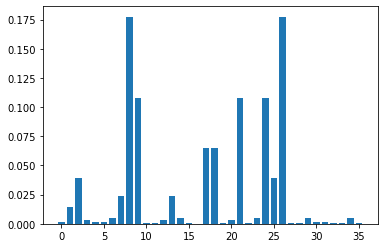

In [146]:
wts = softmax(dnum) * softmax(rval)
wts = wts / wts.sum()
plt.bar(np.arange(len(wts)),wts)

In [149]:
list(map(dict, sites[(-wts).argsort()[:5]]))

[{'ID': '124',
  'nums': [5, 11, 6],
  'ress': ['sheep', 'wood', 'ore'],
  'val': 11},
 {'ID': '99', 'nums': [4, 3, 6], 'ress': ['brick', 'ore', 'wood'], 'val': 10},
 {'ID': '122', 'nums': [6, 10, 4], 'ress': ['ore', 'ore', 'sheep'], 'val': 11},
 {'ID': '115', 'nums': [2, 5, 6], 'ress': ['wood', 'sheep', 'ore'], 'val': 10},
 {'ID': '100', 'nums': [6, 3, 11], 'ress': ['wood', 'ore', 'wheat'], 'val': 9}]

In [150]:
dict(first)

{'ID': '133',
 'nums': [5, 8, 9],
 'ress': ['sheep', 'brick', 'wheat'],
 'val': 13}

In [172]:
pick = I.rng.choices(sites, weights=wts)[0]
dict(pick)

{'ID': '124', 'nums': [5, 11, 6], 'ress': ['sheep', 'wood', 'ore'], 'val': 11}

In [31]:
actions = viz.decode_action_set(I.msg.options.loc.actions)
hexs = tlist(I.msg.table[a.ID] for a, in actions)
len(hexs)

18

In [32]:
hexs[0].keys()

odict_keys(['row', 'col', 'neighbors', 'obj_type', 'visible', 'edges', 'corners', 'res', 'num', '_id'])

In [33]:
remaining = tlist()
for h in hexs:
    for c in h.corners:
        if 'building' in c and c.building.player.name != 'White' and c.building.player.num_res > 0:
            remaining.append(h)
            break
hexs = remaining
len(hexs)

8

In [34]:
hexs = tdict({h._id:h for h in hexs})
options = tdict({k:tdict() for k in hexs})
for ID, h in hexs.items():
    options[ID].val = 5 - abs(h.num - 7)
    pass

In [35]:
options

tdict('5':tdict('val':1), '8':tdict('val':2), '9':tdict('val':2), '10':tdict('val':4), '13':tdict('val':3), '14':tdict('val':2), '15':tdict('val':1), '18':tdict('val':3))

In [38]:
hexs['10'].res, hexs['10'].num

('ore', 6)

In [24]:
log = I.get_log()
len(log)

28

In [21]:
for line in log:
    if 'targets' in line:
        print(line['targets'])

[tdict(_player)]
[tdict(_player)]
[tdict(_player)]
[tdict(_player)]


In [29]:
for h in hexs:
    if 'buildings' in h:
        print(h.corners)

In [31]:
hexs[0].corners

[tdict('_obj':'91'), tdict('_obj':'92'), tdict('_obj':'93'), tdict('_obj':'94'), tdict('_obj':'95'), tdict('_obj':'96')]

In [22]:
hexs = tlist()
for ID, obj in I.msg.table.items():
    if obj.obj_type == 'hex':
        hexs.append(obj)
len(hexs)

19